In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [3]:
#pip install yfinance

In [6]:
pip install yfinance openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Get the data for tatamotors
ticker = "TATASTEEL.NS"  

# Download the data
data = yf.download(ticker, start="1999-01-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-01,6.627917,6.961980,6.608266,6.961980,1.517243,102460586
1999-01-04,6.928293,6.959173,6.757051,6.776701,1.476865,51251221
1999-01-05,6.787930,6.903028,6.714942,6.807581,1.483594,94085842
1999-01-06,6.976016,7.124800,6.914257,7.006896,1.527032,103005603
1999-01-07,7.043390,7.119186,6.990052,7.063041,1.539267,67784303


In [10]:
# Download stock data
stock_data = yf.download(ticker, start="1999-01-01", end="2024-03-31")

# Save to Excel
excel_filename = 'tata_steel.xlsx'
stock_data.to_excel(excel_filename)

print(f"Data has been successfully downloaded and saved to {excel_filename}")

[*********************100%%**********************]  1 of 1 completed


Data has been successfully downloaded and saved to tata_steel.xlsx


In [11]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


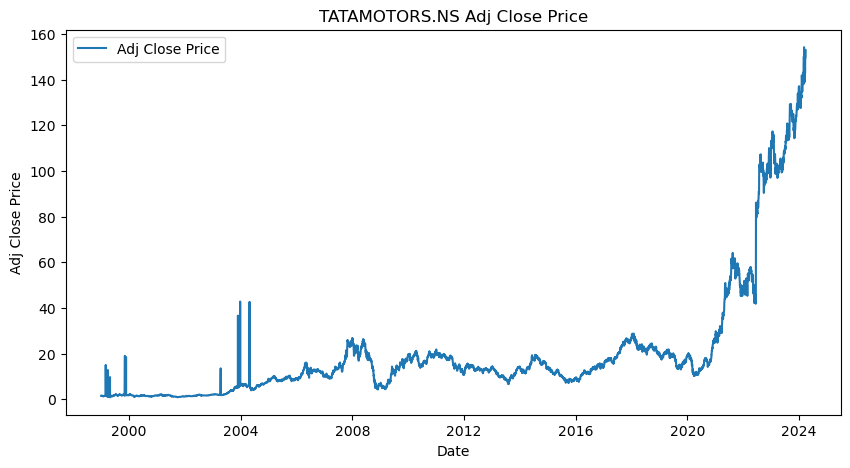

In [12]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('TATAMOTORS.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
df.columns

Index(['Adj Close'], dtype='object')

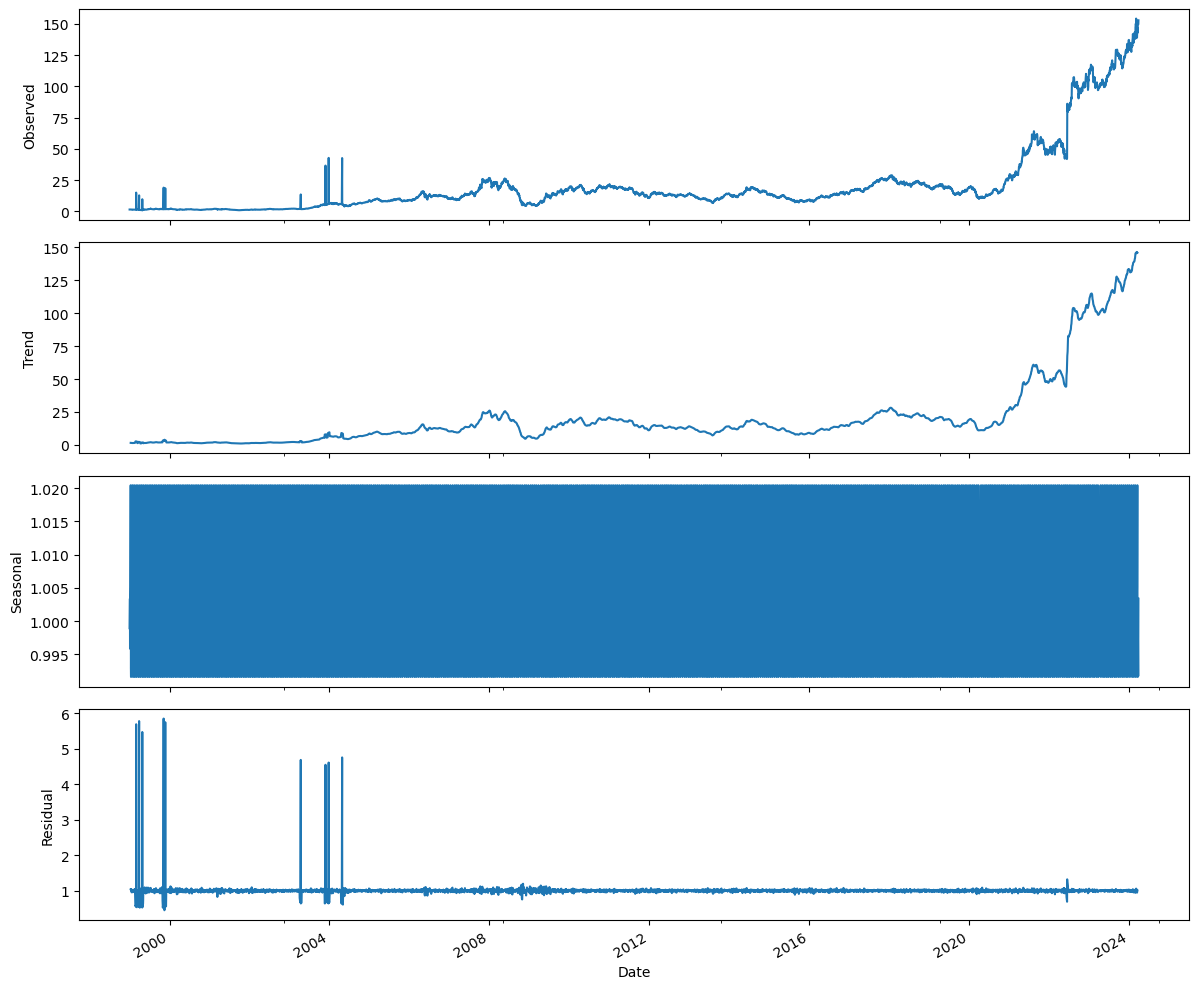

In [15]:
# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [16]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [17]:
monthly_data = df.resample("M").mean()

In [18]:
len(monthly_data), len(train_data)

(303, 5051)

In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate example data
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2020-01-01', periods=36, freq='M'),
    'Value': np.random.rand(36) * 100 + 50  # Ensure all values are positive
}
train_data = pd.DataFrame(data)
train_data.set_index('Date', inplace=True)

# Ensure the DateTime index has a frequency
train_data.index = pd.to_datetime(train_data.index)
train_data.index.freq = 'M'

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data['Value'], seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

print(holt_winters_forecast)


2023-01-31    105.435094
2023-02-28    114.940976
2023-03-31     87.116424
2023-04-30     93.209912
2023-05-31     85.089180
2023-06-30     74.240047
2023-07-31     86.585782
2023-08-31     94.264313
2023-09-30     92.600654
2023-10-31    109.881721
2023-11-30     92.612037
2023-12-31    121.488969
Freq: M, dtype: float64


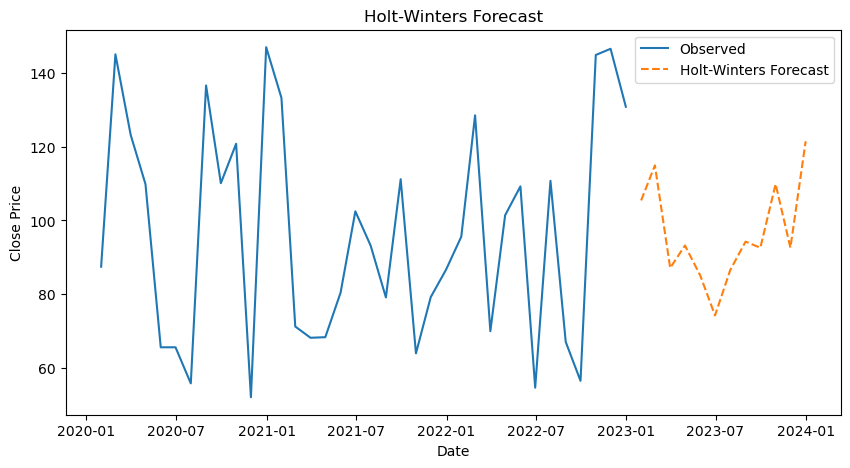

In [23]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [24]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [25]:
len(test_data), len(y_pred)

(1263, 8)

In [26]:
y_pred, test_data

(2023-01-31    105.435094
 2023-02-28    114.940976
 2023-03-31     87.116424
 2023-04-30     93.209912
 2023-05-31     85.089180
 2023-06-30     74.240047
 2023-07-31     86.585782
 2023-08-31     94.264313
 Freq: M, dtype: float64,
              Adj Close
 Date                  
 2019-02-15   18.328394
 2019-02-18   18.251944
 2019-02-19   18.463654
 2019-02-20   19.255594
 2019-02-21   19.557474
 ...                ...
 2024-03-21  147.135559
 2024-03-22  148.801987
 2024-03-26  149.390121
 2024-03-27  149.684204
 2024-03-28  152.772003
 
 [1263 rows x 1 columns])

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming test_data and y_pred are defined
# Example definition for demonstration purposes
test_data = np.array([60, 65, 70, 75, 80, 85, 90, 95])  # Example test data
y_pred = np.array([62, 64, 73, 74, 78, 86, 89, 93])  # Example predictions

# Check if both arrays have the same length
if len(test_data) != len(y_pred):
    raise ValueError(f"Mismatch in lengths: test_data has {len(test_data)} samples, y_pred has {len(y_pred)} samples")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')

# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 1.7677669529663689
MAE: 1.625
MAPE: 2.172960918510454
R-squared: 0.9761904761904762


In [29]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [30]:
holt_winters_forecast

2023-01-31    105.435094
2023-02-28    114.940976
2023-03-31     87.116424
2023-04-30     93.209912
2023-05-31     85.089180
2023-06-30     74.240047
2023-07-31     86.585782
2023-08-31     94.264313
2023-09-30     92.600654
2023-10-31    109.881721
2023-11-30     92.612037
2023-12-31    121.488969
2024-01-31    105.435094
2024-02-29    114.940976
2024-03-31     87.116424
2024-04-30     93.209912
2024-05-31     85.089180
2024-06-30     74.240047
2024-07-31     86.585782
2024-08-31     94.264313
Freq: M, dtype: float64

In [31]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [33]:
pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 660.6 kB/s eta 0:00:01
   ----------------- ---------------------- 266.2/614.7 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------- ----------------------- 1.1/2.8 MB 36.7 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 33.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 35.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
from pmdarima import auto_arima

In [37]:
print(train_data.columns)

Index(['Value'], dtype='object')


In [38]:
# Fit auto_arima model using the correct column name
arima_model = auto_arima(train_data['Value'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                                 SARIMAX Results                                  
Dep. Variable:                          y   No. Observations:                   36
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                -171.495
Date:                    Mon, 22 Jul 2024   AIC                            348.989
Time:                            15:12:47   BIC                            353.740
Sample:                        01-31-2020   HQIC                           350.647
                             - 12-31-2022                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     95.5986      3.540     27.006      0.000      88.660     102.537
ma.S.L12      -0.4802      0.333     -1.444      0.149      -1.132       0.172
sigma2       737.454

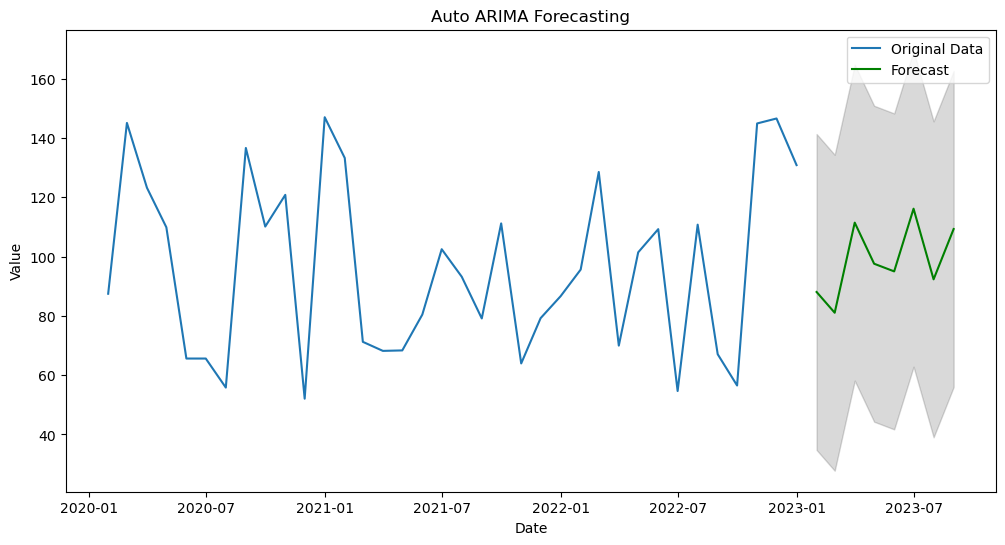

In [40]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Create a DateTimeIndex for the forecast period
forecast_index = pd.date_range(start=train_data.index[-1] + pd.DateOffset(1), periods=n_periods, freq='M')

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Value'], label='Original Data')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.fill_between(forecast_index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [41]:
len(forecast)

8

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 24.17241748293193
MAE: 21.354363260901017
MAPE: 21.26839794823892
R-squared: -3.45185346262212


In [43]:
daily_data= df.copy()

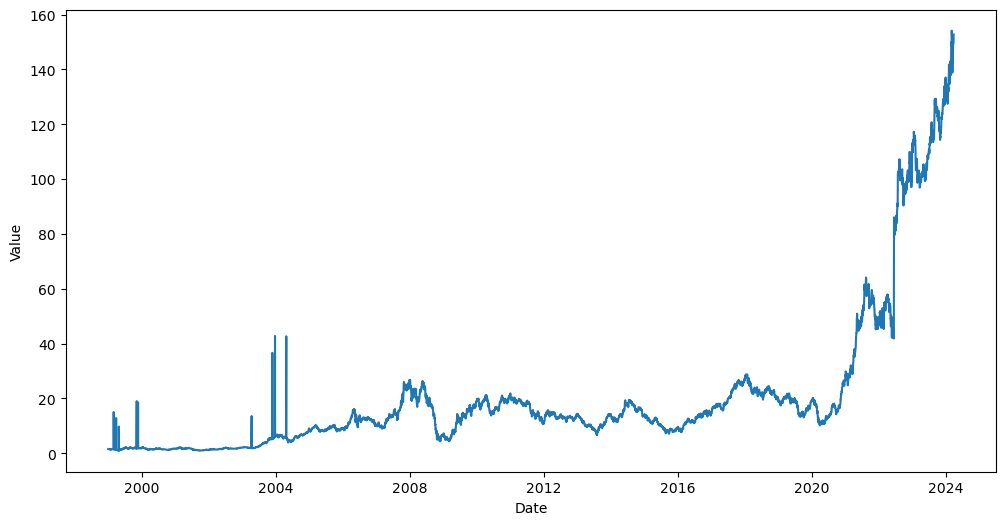

In [44]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [45]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

In [46]:
# Print the model summary
print(arima_model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 6314
Model:             SARIMAX(5, 2, 0)x(2, 0, [1, 2], 7)   Log Likelihood              -11710.085
Date:                                Mon, 22 Jul 2024   AIC                          23440.170
Time:                                        15:17:04   BIC                          23507.672
Sample:                                             0   HQIC                         23463.551
                                               - 6314                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1575      0.001   -802.399      0.000      -1.160      -1.155
ar.

In [47]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [48]:
fitted_values

Date
1999-01-01      0.000000
1999-01-04      2.275864
1999-01-05      1.436492
1999-01-06      1.461243
1999-01-07      1.517526
                 ...    
2024-03-21    142.027558
2024-03-22    145.952330
2024-03-26    149.947848
2024-03-27    151.536750
2024-03-28    151.401927
Name: predicted_mean, Length: 6314, dtype: float64

In [50]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 60 months

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

C:\Users\manor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\manor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [51]:
len(forecast)

60

In [55]:
len(future_dates)

60

In [53]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

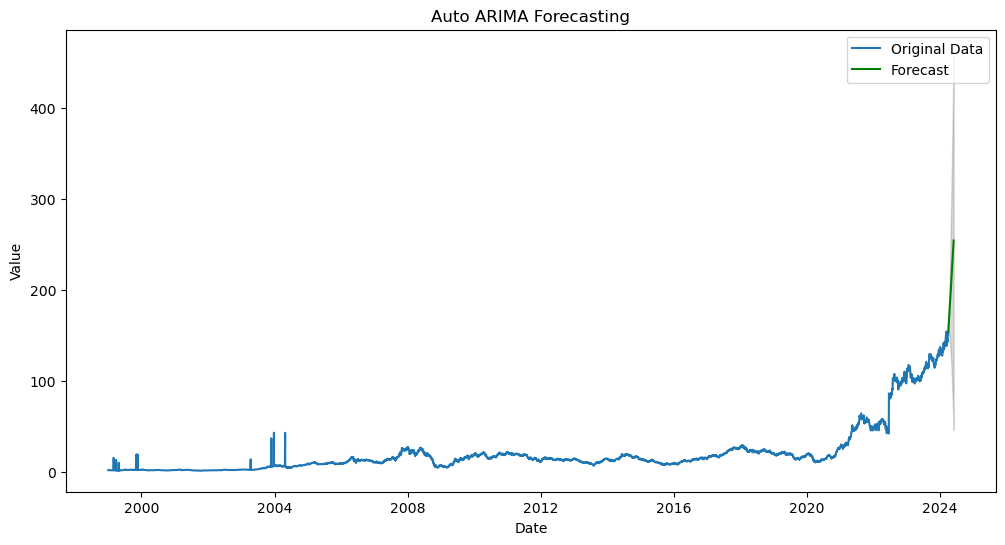

In [54]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [56]:
# pip install tensorflow

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Value') and target ('Value')
features = data.drop(columns=['Value'])
target = data[['Value']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=data.index)
scaled_df['Value'] = scaled_target


In [67]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Value')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (6, 30, 2)
Shape of y: (6,)


In [69]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(sequence_length, X.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4618 - val_loss: 0.7702
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2888 - val_loss: 0.6074
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2532 - val_loss: 0.4609
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.2115 - val_loss: 0.3335
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1693 - val_loss: 0.2316
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1491 - val_loss: 0.1570
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1336 - val_loss: 0.1098
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1219 - val_loss: 0.0842
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1614 - val_loss: 0.0810
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.1584 - val_loss: 0.0846
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1407 - val_loss: 0.0974
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1481 - val_loss: 0.1192
Ep

In [71]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


In [94]:
# Ensure there are enough predictions and true values to print
num_samples_to_print = min(10, len(y_pred_scaled), len(y_test_scaled))

print("Predictions vs True Values:")
for i in range(num_samples_to_print):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")


Predictions vs True Values:
Prediction: 90.68240895528953, True Value: 146.56320330745592
Prediction: 91.5744900011381, True Value: 130.8397348116461


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 48.29297375114851
MAE: 47.5730195813372
MAPE: 52.25022933162264
R-squared: -36.733855279888814


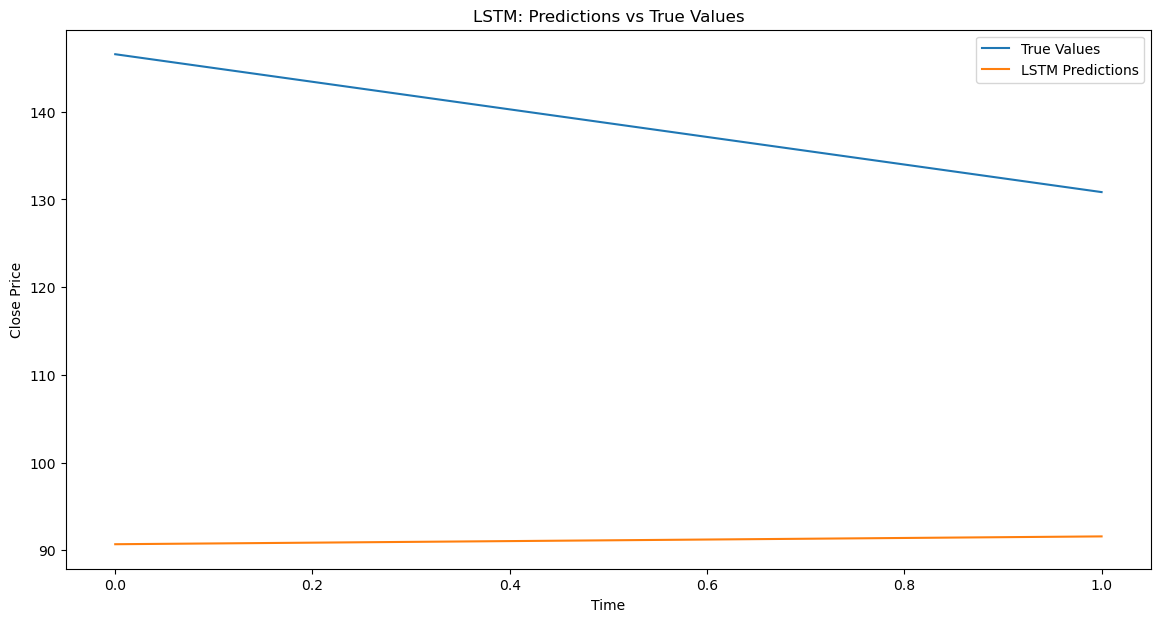

In [75]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [76]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [78]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Value')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)


In [79]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [80]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.16945021929801485


In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.4116433156241151
MAE: 0.34127698383334576
MAPE: 193720.9767624962
R-squared: -2.1983664204947764


In [83]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.04512095333293324


In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.21241693278298987
MAE: 0.2035084199767026
MAPE: 20290.452037392664
R-squared: 0.14834372833144982


In [86]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(2):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.046840736235494784, True Value: 0.6182920878938204
Prediction: 0.046840736235494784, True Value: 0.1579433522438607


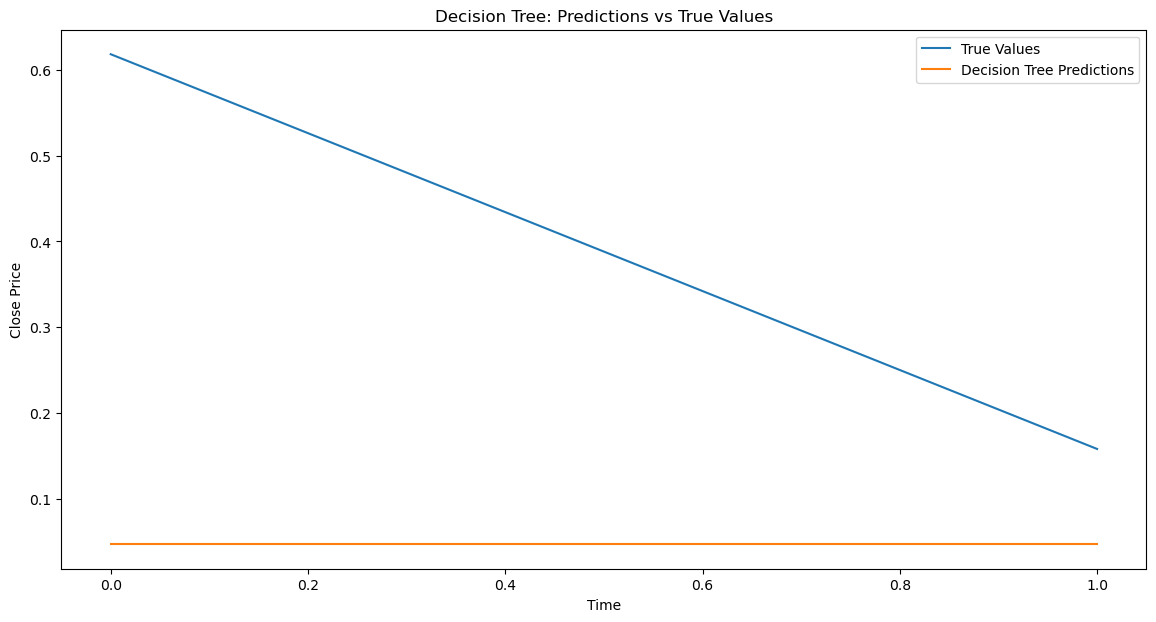

In [87]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [91]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(2):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.47565464894682746, True Value: 0.6182920878938204
Prediction: 0.42232275325027296, True Value: 0.1579433522438607


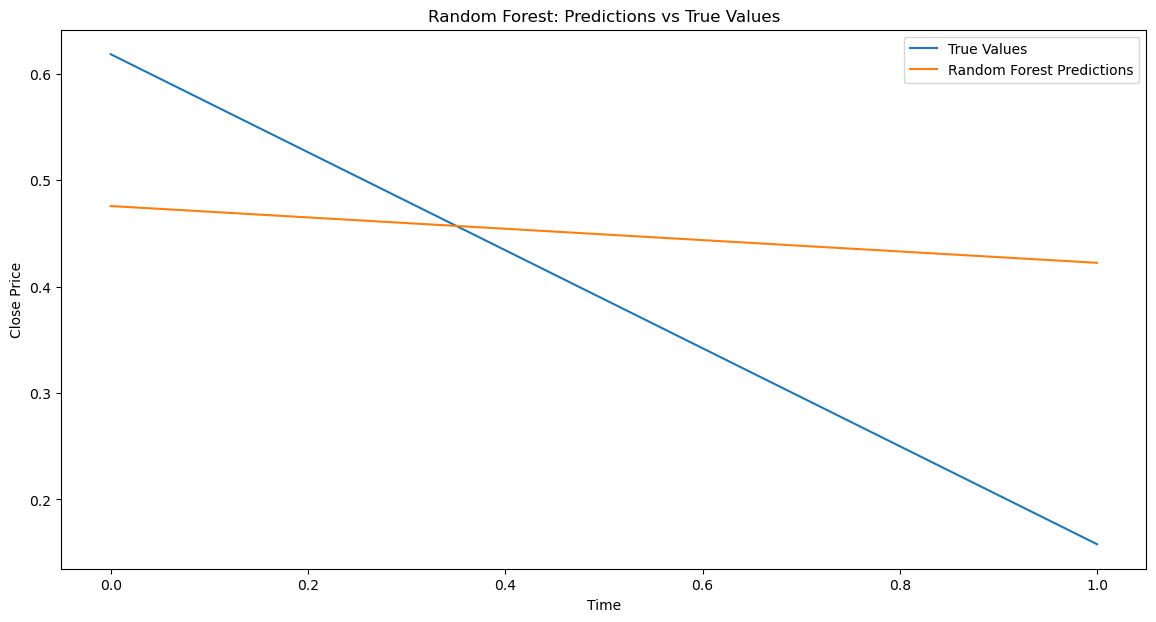

In [92]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

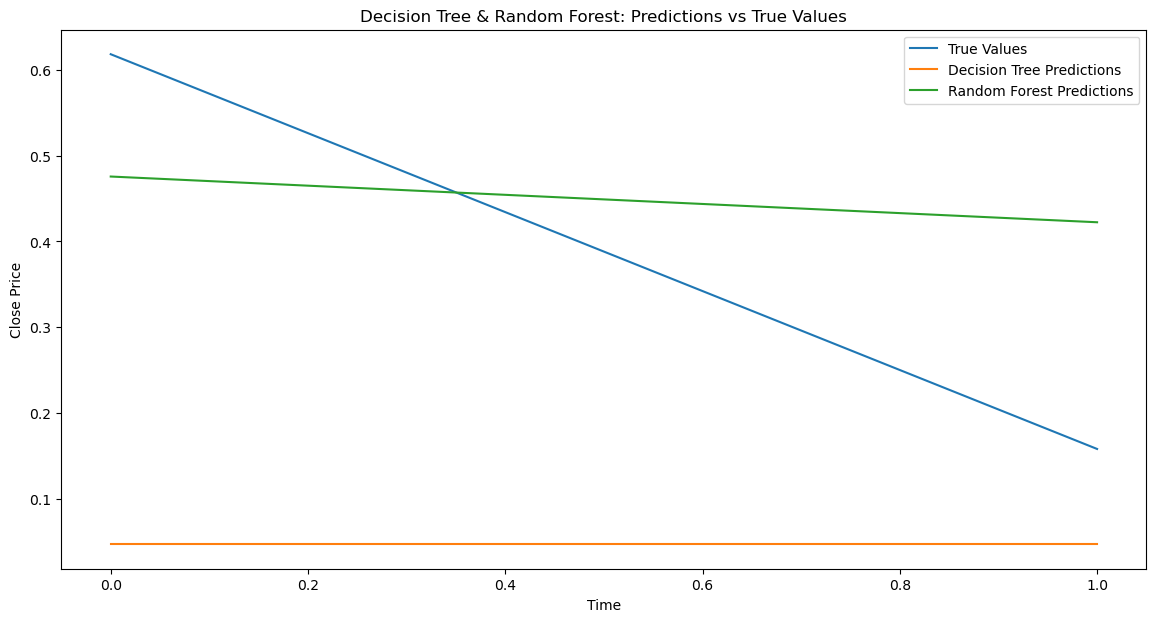

In [93]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()